In [389]:
import glob
import numpy as np
import os.path
from ecell4 import *
import math
from math import sqrt,pi
import matplotlib.pyplot as plt
import mpmath as mp
%matplotlib inline
from scipy import special
from scipy.optimize import curve_fit
from mpmath import ellipk
mydehoog = mp.calculus.inverselaplace.deHoog(mp)

def err(a,b):
    return (a-b)*100/b

def calk(stsim,t,C): #get kt from st
    dst = (stsim[2:]-stsim[:-2])/(t[2:]-t[:-2])
    dst=np.append((stsim[1]-stsim[0])/(t[1]-t[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2])/(t[-1]-t[-2])  )
    #print(dst[:3],stsim[:3],C,t[2]-t[0])
    return -dst/stsim/C

def calchange(stsim):
    dst = (stsim[2:]-stsim[:-2])
    dst=np.append((stsim[1]-stsim[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2]) )
    return -dst

def calkfrmnt(nt,t,c):
    dnt = (nt[2:]-nt[:-2])/(t[2:]-t[:-2])
    dnt=np.append((nt[1]-nt[0])/(t[1]-t[0]),dnt)
    dnt=np.append(dnt,(nt[-1]-nt[-2])/(t[-1]-t[-2]))
    return -dnt/nt/c    

def dividet(dat,t):
    dt = t[1]-t[0]
    out = dat[0]/dt
    out = np.append(out,dat[1:-1]/dt/2)
    out=np.append(out,dat[-1]/dt)
    return out

def funclt(t,C1,C2,D): #continuum kt at long time
    #C1=ka,C2=R=2*rm,
    g = 0.577216
    b1=4*D/C2/C2
    A=np.log(b1*t)+4*pi*D/C1-2*g
    return 4*pi*D*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)

def funcL(t,P,l,D,Ns,Area,shift):    
    g = 0.577216
    td=l*l/4/D
    kap=P*Area/td/Ns
    #print('kap',kap)
    kap=kap+kap*shift
    #print('kap shifted',kap)
    b1=48*D/l/l
    a = 2*pi/sqrt(3)
    A=np.log(b1*t)+a*(1./P-1)
    return a*kap*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)/P

def latK(s,D,Pa,td):
    b1 = Pa/6/td;
    b2 = 1/td;
    p101 = 1/6; 
    zz = b2/(b2+s);
    a = 3/zz+1-(3+6/zz)**0.5;
    b = 3/zz+1+(3+6/zz)**0.5;
    c = (a+1)*(b-1);
    kk = 2*(b-a)/c
    EF = ellipk(kk);
    Pz = 6*EF/pi/zz/(c)**0.5;
    f11 = 1-zz*zz*p101/(Pz-1);
    g = b1/(s+b1+b2-s*zz/3-b2*f11);
    return 2*Pa*D*3**0.5*(1-g)/s;

def invltL(t,D,Pa,td): #inverse laplace transform of lattice k(s)
    mp.dps = 8#15;
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [latK(p,D,Pa,td) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=True)))
    return ft

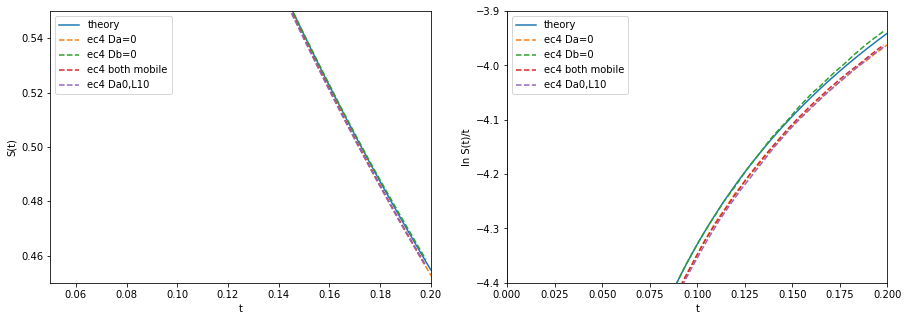

In [140]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

name = '/home/chew/outputdata/keff/2D/2Dirr100N100A423799.csv'
T,STth = np.loadtxt(name,delimiter=',').T
y = np.log(STth)/T
ax[0].plot(T,STth,'-',label='theory')
ax[1].plot(T,y,'-',label='theory')

e = '/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_50tm_1.0208582rm_meanst'
t,st = np.loadtxt(e,delimiter=',')
y = np.log(st)/t
ax[0].plot(t,st,'--',label='ec4 Da=0')
ax[1].plot(t,y,'--',label='ec4 Da=0')

e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_DB0_meanst_Db0'    
t,st = np.loadtxt(e,delimiter=',')
y = np.log(st)/t
ax[0].plot(t,st,'--',label='ec4 Db=0')
ax[1].plot(t,y,'--',label='ec4 Db=0')

e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_bothmobile_meanst_bothmobile'
t,st = np.loadtxt(e,delimiter=',')
y = np.log(st)/t
ax[0].plot(t,st,'--',label='ec4 both mobile')
ax[1].plot(t,y,'--',label='ec4 both mobile')

e='/home/chew/outputdata/keff/2D/newkfac100_N237_L10_100tm_1.0208582rm_Da0_meanst'
t,st = np.loadtxt(e,delimiter=',')
y = np.log(st)/t
ax[0].plot(t,st,'--',label='ec4 Da0,L10')
ax[1].plot(t,y,'--',label='ec4 Da0,L10')

ax[0].set_xlabel('t')
ax[0].legend()   
ax[0].set_xlim(0.05,0.2)
ax[0].set_ylim(0.45,0.55)
ax[0].set_ylabel('S(t)')
ax[0].set_xlabel('t')

ax[1].set_xlim(0.0,0.2)
ax[1].set_ylim(-4.4,-3.9)
#ax[1].set_ylim(-6,-3.9)
ax[1].set_ylabel('ln S(t)/t')
ax[1].set_xlabel('t')
ax[1].legend()   


[0.45366834 0.45362933 0.45359033 0.45355133 0.45351233]
[0.46115961 0.45907476 0.45702891 0.45497969 0.45290359]
[0.46413588 0.46207607 0.46003017 0.45799235 0.45595153]
[0.46168165 0.45960384 0.45752785 0.45546587 0.45340997]


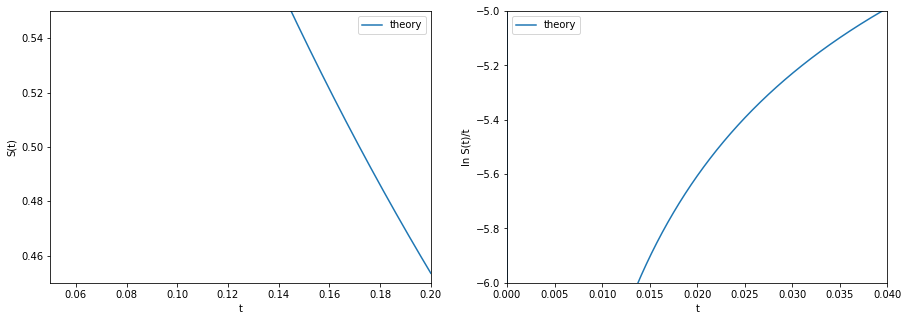

In [325]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

name = '/home/chew/outputdata/keff/2D/2Dirr100N100A42247.csv'
T,STth = np.loadtxt(name,delimiter=',')[::100].T
print(STth[-5:])
y = np.log(STth)/T
ax[0].plot(T,STth,'-',label='theory')
ax[1].plot(T,y,'-',label='theory')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_Da0',delimiter=',')
y = np.log(st)/t
print(st[-5:])
#ax[0].plot(t,st,'--',label='ec3 Da=0')
#ax[1].plot(t,y,'--',label='ec3 Da=0')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic',delimiter=',')
y = np.log(st)/t
print(st[-5:])
#ax[0].plot(t,st,'--',label='ec3 Db=0')
#ax[1].plot(t,y,'--',label='ec3 Db=0')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_bothmobile',delimiter=',')
y = np.log(st)/t
print(st[-5:])
#ax[0].plot(t,st,'--',label='ec3 both mobile')
#ax[1].plot(t,y,'--',label='ec3 both mobile')

ax[0].set_xlabel('t')
ax[0].legend()   
ax[0].set_xlim(0.05,0.2)
ax[0].set_ylim(0.45,0.55)
ax[0].set_ylabel('S(t)')
ax[0].set_xlabel('t')

ax[1].set_xlim(0.0,0.04)
#plt.ylim(-0.8,-0.2)
ax[1].set_ylim(-6,-5)
#ax[1].set_ylim(-4.4,-3.9)
ax[1].set_ylabel('ln S(t)/t')
ax[1].set_xlabel('t')
ax[1].legend()   


In [411]:
def singleplot(nm,C,ds,lab):
    print(lab,'C',C)
    t,st = np.loadtxt(nm,delimiter=',')
    print('st',st[:3])
    #print('dt',t[1]-t[0])
    ktsim = calkfrmnt(st,t,C)
    t=t[::ds]
    ktsim=ktsim[::ds]
    ax[0].plot(t,ktsim,'-',label=lab)
    #th = funcL(t,P,l,D,Ns,Area,0)
    th=funclt(t,ka,R,D)
    dif = (ktsim-th)*100/th
    print('mean diff',np.mean(dif[int(l*0.5):]))
    ax[1].plot(t,dif,label=lab)

P 91.72793663882513
ec4 Db0 NaNb100 C 2.359609154339675
st [0.9775395 0.9624995 0.948821 ]
mean diff -0.0491866051724968
ec4 Db0 Na100Nb500 C 11.798045771698376
st [0.932939   0.89207125 0.85678425]
mean diff -3.9608773395636976


(-3.0, 3)

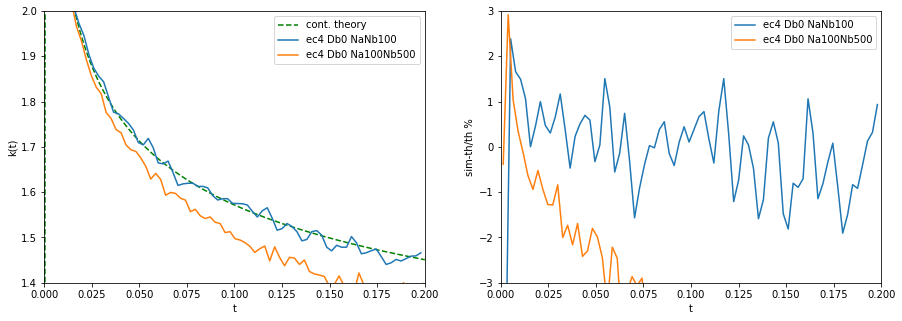

In [414]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

#ds=4
Area=42.3799
N0=100
C=N0/Area
kf=100
g = 0.577216
L=6.5
f=1.0208582
R=0.01
l=R*f
D=1
ka=kf*D*4*pi
w = spatiocyte.SpatiocyteWorld(Real3(0.1*L,L,L),l*0.5)
size=tuple(w.calculate_shape(Real3(0.1*L,L,L),l*0.5))
Ns=size[1]*size[2]
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
print('P',P)
#ax[0].plot(t,funcL(t,P,l,D,Ns,Area,0),'r--',label='lat theory')   
ax[0].plot(t,funclt(t,ka,R,D),'g--',label='cont. theory')

DS=2

#e = '/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_50tm_1.0208582rm_meanst'
#singleplot(e,C,DS,'ec4 Da0 N100')

#e = '/home/chew/outputdata/keff/2D/newkfac100_N903_L19.5_50tm_1.0208582rm_Da0Db1_meanst'
#singleplot(e,903/381.0206,DS,'ec4 Da0 NaNb903')

#e = '/home/chew/outputdata/keff/2D/newkfac100_N903_L19.5_50tm_1.0208582rm_Da0Db1_Na100_meanst'
#singleplot(e,903/381.0206,DS,'ec4 Da0 Na100Nb903')

e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_DB0_meanst_Db0'    
singleplot(e,C,1,'ec4 Db0 NaNb100')

#e = '/home/chew/outputdata/keff/2D/newkfac100_N903_L19.5_50tm_1.0208582rm_Da1Db0_meanst'
#singleplot(e,903/381.0206,DS,'ec4 Db0 NaNb903')

e = '/home/chew/outputdata/keff/2D/newkfac100_Na100Nb500_L6.5_50tm_1.0208582rm_Da1Db0_meanst'
singleplot(e,500/Area,DS,'ec4 Db0 Na100Nb500')

#e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_bothmobile_meanst_bothmobile'
#singleplot(e,C,1,'ec4 both mobile')

#e='/home/chew/outputdata/keff/2D/newkfac100_N237_L10_100tm_1.0208582rm_Da0_meanst'
#t,st = np.loadtxt(e,delimiter=',')
#ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec4 Da0,L10')

   
#ax[0].plot(t,funcL(t,P,l,D,Ns,Area,0.01),'c--',label='lat theory +1%kap')       
#ax[0].plot(t,funcL(t,P,l,D,Ns,Area,-0.01),'y--',label='lat theory -1%kap')       
ax[0].set_xlabel('t')
ax[0].legend()   
ax[0].set_xlim(0.0,0.2)
ax[0].set_ylim(1.4,2)
ax[0].set_ylabel('k(t)')
ax[0].set_xlabel('t')

ax[1].legend()
ax[1].set_ylabel('sim-th/th %')
ax[1].set_xlabel('t')
ax[1].set_xlim(0.0,0.2)
ax[1].set_ylim(-3.0,3)

42.247051570158554 42.2892
dt 0.00130268933063405
dt 0.00130268933063405
dt 0.00130268933063405
dt 0.00130268933063405
dt 0.00130268933063405
dt 0.00130268933063405
C 11.835145446059432
dt 0.000130268933063405
0.0051042909999999995
0.35595769114178577


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


(-3, 3)

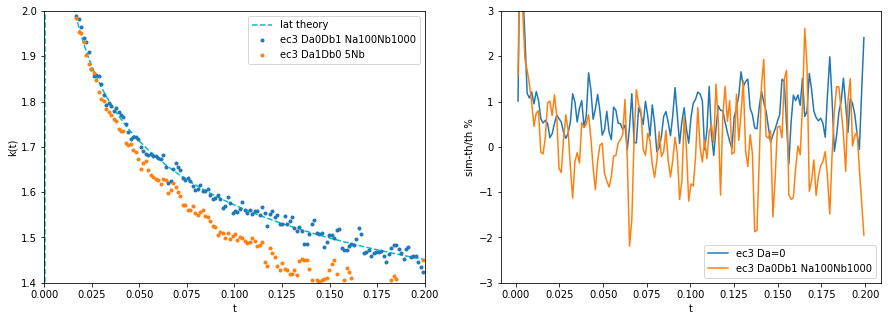

In [483]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
Ns=468096
Area = 6*l*l*Ns/4/sqrt(3) 
Area1=42.2892
print(Area,Area1)
N0=100
C=N0/Area
kf=100
g = 0.577216
L=6.5
f=1.0208582
R=0.01
l=R*f
D=1
ka=kf*D*4*pi

P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)

ax[0].plot(t,funcL(t,P,l,D,Ns,Area,0),'c--',label='lat theory')       
#ax[0].plot(t,funcL(t,P,l,D,Ns,Area,0.01),'r--',label='lat theory +1%kap')       
#ax[0].plot(t,funcL(t,P,l,D,Ns,Area,-0.01),'r--',label='lat theory -1%kap')   

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_Da0',delimiter=',')
print('dt',t[1]-t[0])
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'-',label='ec3 Da=0')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
ax[1].plot(t,dif,label='ec3 Da=0')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic',delimiter=',')
print('dt',t[1]-t[0])
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'-',label='ec3 Db=0')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 Db=0')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_bothmobile',delimiter=',')
print('dt',t[1]-t[0])
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'-',label='ec3 both mobile')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 both mobile')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da1.0Db0.0',delimiter=',')
print('dt',t[1]-t[0])
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'.',label='ec3 Da1Db0')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 Da1Db0')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da0.0Db1.0',delimiter=',')
print('dt',t[1]-t[0])
#ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'.',label='ec3 Da0Db1')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 Da0Db1')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_L19.5_Na100Nb1000meanst_Da0.0Db1.0',delimiter=',')
print('dt',t[1]-t[0])
C=1000/19.5/19.5
ktsim = calkfrmnt(st,t,C)
ax[0].plot(t,ktsim,'.',label='ec3 Da0Db1 Na100Nb1000')
th=funclt(t,ka,R,D)
dif = (ktsim-th)*100/th
ax[1].plot(t,dif,label='ec3 Da0Db1 Na100Nb1000')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da1.0Db0.0_5Nb',delimiter=',')
#itern = 200*100
C=500/Area
ktsim = calkfrmnt(st,t,C)
ax[0].plot(t,ktsim,'.',label='ec3 Da1Db0 5Nb')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 Da1Db0 5Nb')

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da0.0Db1.0_5Nb',delimiter=',')
#itern = 200*100
C=500/Area
print('C',C)
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'.',label='ec3 Da0Db1 5Nb')
th = funcL(t,P,l,D,Ns,Area,0)
dif = (ktsim-th)*100/th
#ax[1].plot(t,dif,label='ec3 Da0Db1 5Nb')

fn='/home/chew/spatiocyte_example/2D/output/newPa_2D_irr_kf100N1L0.6/run0.csv'
t,st=np.array(np.loadtxt(fn,delimiter=',',skiprows=1)).T
print('dt',t[1]-t[0])
Ns=3944
f=1.0208582
l=R*f
print(l*0.5)
Area = 6*l*l*Ns/4/sqrt(3) 
print(Area)
C=1./Area
ktsim = calkfrmnt(st,t,C)
#ax[0].plot(t,ktsim,'-',label='ec3 pair')

ax[0].set_xlabel('t')
ax[0].legend()   
ax[0].set_xlim(0.0,0.2)
ax[0].set_ylim(1.4,2)
ax[0].set_ylabel('k(t)')
ax[0].set_xlabel('t')

ax[1].legend()
ax[1].set_ylabel('sim-th/th %')
ax[1].set_xlabel('t')
ax[1].set_ylim(-3,3)

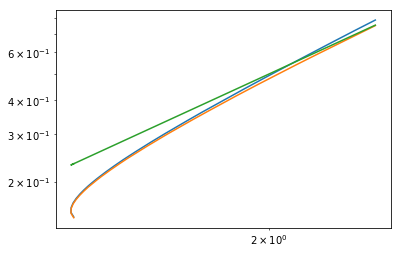

In [498]:
t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da0.0Db1.0_5Nb',delimiter=',')
tt=t[5:]/t[0]
st=st[5:]
st = -np.log(st)/np.log(tt)
T=np.sqrt(tt)/np.log(tt)
plt.loglog(T,st)
t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da1.0Db0.0_5Nb',delimiter=',')
tt=t[5:]/t[0]
st=st[5:]
st = -np.log(st)/np.log(tt)
T=np.sqrt(tt)/np.log(tt)
plt.loglog(T,st)
plt.loglog(T,0.125*T**2)
#plt.xlim(0.1,0.2)

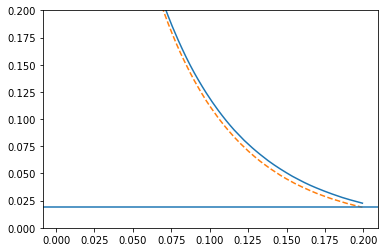

In [334]:
t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da1.0Db0.0_5Nb',delimiter=',')
plt.plot(t,st,'-')
t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da0.0Db1.0_5Nb',delimiter=',')
plt.plot(t,st,'--')
plt.ylim(0,0.2)
plt.axhline(0.019230)

lattice theory ka 317.75486397066794
Da=0 fitted lattice ka=319.9940+-0.1976,rmse=0.0215,kafit-kath/kath,%=0.7047
Db=0 fitted lattice ka=317.8732+-0.3000,rmse=0.0123,kafit-kath/kath,%=0.0372
both mobile fitted lattice ka=319.8670+-0.1665,rmse=0.0038,kafit-kath/kath,%=0.6647


Text(0.5,0,'t')

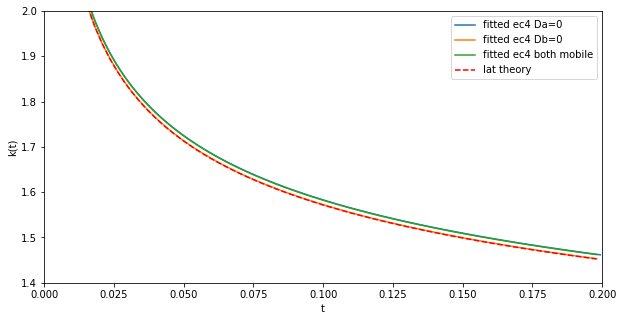

In [297]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

Area=42.3799
N0=100
C=N0/Area
l=R*f
kf=100
g = 0.577216
L=6.5
f=1.0208582
R=0.01
D=1
ka=kf*D*4*pi
td=l*l/4/D
w = spatiocyte.SpatiocyteWorld(Real3(0.1*L,L,L),l*0.5)
size=tuple(w.calculate_shape(Real3(0.1*L,L,L),l*0.5))
Ns=size[1]*size[2]
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
kath=P*Area/td/Ns
print('lattice theory ka',kath)

def funcfit(t,kap):    
    g = 0.577216
    b1=48*D/l/l
    a = 2*pi/sqrt(3)
    A=np.log(b1*t)+a*(1./P-1)
    return a*kap*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)/P

e = '/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_50tm_1.0208582rm_meanst'
t,st = np.loadtxt(e,delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec4 Da=0')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec4 Da=0')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('Da=0 fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_DB0_meanst_Db0'    
t,st = np.loadtxt(e,delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec4 Db=0')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec4 Db=0')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('Db=0 fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

e='/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_100tm_1.0208582rm_bothmobile_meanst_bothmobile'
t,st = np.loadtxt(e,delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec4 both mobile')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec4 both mobile')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('both mobile fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

ax.plot(t,funcL(t,P,l,D,Ns,Area,0),'r--',label='lat theory')       
ax.set_xlabel('t')
ax.legend()   
ax.set_xlim(0.0,0.2)
ax.set_ylim(1.4,2)
ax.set_ylabel('k(t)')
ax.set_xlabel('t')

lattice theory ka 317.75450558655643
Da=0 fitted lattice ka=319.9669+-0.1169,rmse=0.0075,kafit-kath/kath,%=0.6963
Db=0 fitted lattice ka=317.1298+-0.1224,rmse=0.0082,kafit-kath/kath,%=-0.1966
Db=0 fitted lattice ka=316.9429+-0.1819,rmse=0.0182,kafit-kath/kath,%=-0.2554


Text(0.5,0,'t')

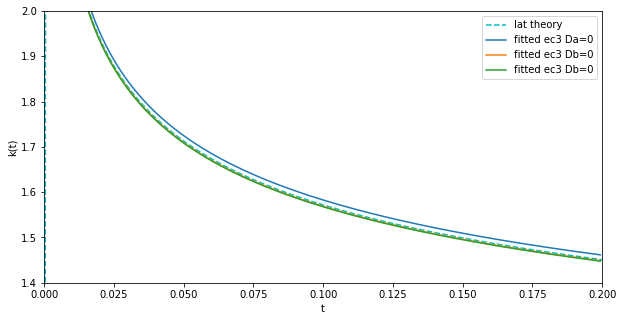

In [317]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

Area=42.247
N0=100
C=N0/Area
l=R*f
kf=100
g = 0.577216
L=6.5
f=1.0208582
R=0.01
D=1
ka=kf*D*4*pi
Ns=468096
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
kath=P*Area/td/Ns
print('lattice theory ka',kath)

def funcfit(t,kap):    
    g = 0.577216
    b1=48*D/l/l
    a = 2*pi/sqrt(3)
    A=np.log(b1*t)+a*(1./P-1)
    return a*kap*(1/A-g/A**2+(g**2-np.pi**2/6)/A**3+0.25/A**4)/P

ax.plot(t,funcL(t,P,l,D,Ns,Area,0),'c--',label='lat theory')       

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_Da0',delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec3 Da=0')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec3 Da=0')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('Da=0 fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic',delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec3 Db=0')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec3 Db=0')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('Db=0 fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100_N100_L6.5_meanst_Da1.0Db0.0',delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec3 Db=0')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec3 Db=0')
perr = np.sqrt(np.diag(pcov))
r1=sum((ktfit-funcfit(tfit,*popt))**2)
print('Db=0 fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))

t,st = np.loadtxt('/home/chew/spatiocyte_example/2D/ec3_newPa_simkf100.0_N100_L6.5_50tm_meanst_periodic_bothmobile',delimiter=',')
ktsim = calkfrmnt(st,t,C)
#ax.plot(t,ktsim,'-',label='ec3 both mobile')
idx = (t>0.01)*(t<0.2)
tfit = t[idx]
ktfit = ktsim[idx]
popt,pcov = curve_fit(funcfit,tfit,ktfit)
#ax.plot(tfit,funcfit(tfit,*popt),'-',label='fitted ec3 both mobile')
#perr = np.sqrt(np.diag(pcov))
#r1=sum((ktfit-funcfit(tfit,*popt))**2)
#print('both mobile fitted lattice ka={:.4f}+-{:.4f},rmse={:.4f},kafit-kath/kath,%={:.4f}'.format(popt[0],perr[0],r1,err(popt[0],kath)))




ax.set_xlabel('t')
ax.legend()   
ax.set_xlim(0.0,0.2)
ax.set_ylim(1.4,2)
ax.set_ylabel('k(t)')
ax.set_xlabel('t')


/home/chew/outputdata/keff/2D/newkfac100_N100_L6.5_50tm_1.0208582rm/*
size 4000
iteration 4000


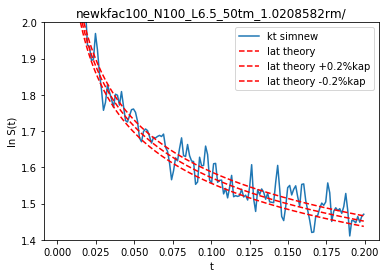

In [85]:
kf=100
g = 0.577216
L=6.5
f=1.0208582
N0=100
Area = 42.247 #ec3
Area=42.3799 #ec4
R=0.01
D=1
ka=kf*D*4*pi
l=R*f
w = spatiocyte.SpatiocyteWorld(Real3(0.1*L,L,L),l*0.5)
size=tuple(w.calculate_shape(Real3(0.1*L,L,L),l*0.5))
Ns=size[1]*size[2]
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)

#fig,ax=plt.subplots(4,1,figsize=(7,20))
#fig,ax=plt.subplots(1,2,figsize=(15,5))
fig,ax=plt.subplots(1,1)
clr=['g','m']
for i,pad in enumerate(['new']):#,'new']):
    #pattern = '/home/chew/spatiocyte_example/2D/output/{}Pa_2D_irr_kf{}N{}L6.5_Da0/*'.format(pad,kf,N0)
    pattern = '/home/chew/outputdata/keff/2D/{}kfac{}_N{}_L{}_50tm_1.0208582rm/*'.format(pad,kf,N0,L)
    FNS = glob.glob(pattern)[:4000]
    print(pattern)
    print('size',len(FNS))
    ss=[]
    cnter = 0
    #ktlast=[[],[],[]]
    ktlast=[]
    KT=[]
    tlast=[]
    dur = 0.2
    CC=[]
    cclast=[]
    ST=[]
    NT=[]
    for fn in FNS:
        #t,nt=np.array(np.loadtxt(fn,delimiter=',',skiprows=1)).T
        #print(nt,t)
        t,nt=np.loadtxt(fn,delimiter=',').T
        assert(nt[0]==N0)
        ds=1
        nt=nt[1::ds]
        t=t[1::ds]
        idx = t<dur
        t=t[idx]
        nt=nt[idx]
        st =nt/float(N0)
        cnter+=1
        if len(NT)==0:
            NT=nt
        else: 
            NT+=nt
    NT = NT/cnter
    print('iteration',cnter)
    dt=t[2]-t[0]
    C=N0/Area
    ktsim = calkfrmnt(NT,t,C)
    #print(ktsim3[-5:])
    #ST = NT/N0
    #ax.plot(T,np.log(STth),label='theory')
    #ax.plot(t,np.log(ST),'--',label='sim')
    
    ax.plot(t,ktsim,'-',label='kt sim'+pad)
    #ax.plot(t,funclt(t,ka,R,D),'g-',label='cont. theory')
    ax.plot(t,funcL(t,P,l,D,Ns,Area,0),'r-',label='lat theory')       
    ax.plot(t,funcL(t,P,l,D,Ns,Area,0.01),'r--',label='lat theory +1%kap')       
    ax.plot(t,funcL(t,P,l,D,Ns,Area,-0.01),'r--',label='lat theory -1%kap')       
    ax.set_ylim(1.4,2)
    ax.set_title(pattern[30:-1])
    #ax.set_xlim(0.05,0.2)
    #ax.set_ylim(0.5,0.8)
    #ax.set_ylabel('changes in molecules number')
    ax.set_ylabel('ln S(t)')
    ax.set_xlabel('t')
    ax.legend()    


In [86]:
4.2343*100/317.1126

1.3352670313320885

(0.5750333333333337, 0.5716038646958971, 0.1930642798266372)

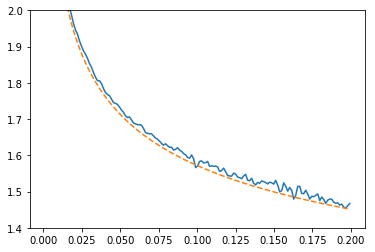

In [305]:
ktsim = dividet(cNT,t)/NT/C
ktth = dividet(cNTth,t)/NT/C
plt.plot(t,ktsim)
plt.plot(t[:-1],ktth[:-1],'--')
#plt.plot(t,funcL(t,P,l,D,Ns,Area),'r-',label='lat theory')       
plt.ylim(1.4,2)
cNT[-2],cNTth[-2],(t[2]-t[1])*NT[-1]*C

(0.8, 1.2)

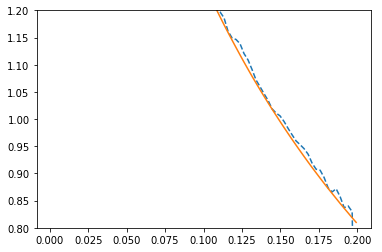

In [243]:
def calchange(stsim):
    dst = (stsim[2:]-stsim[:-2])
    dst=np.append((stsim[1]-stsim[0]),dst)
    dst=np.append(dst,(stsim[-1]-stsim[-2]) )
    return -dst

cNT = calchange(NT[::2])
dt=t[::2][2]-t[::2][0]
cNTth = funcL(t[::2],P,l,D,Ns,Area)*dt*NT[::2]*C
plt.plot(t[::2],cNT,'--',label='sim')
plt.plot(t[::2],cNTth,'-',label='theory')
#plt.ylim(0.4,0.8)
plt.ylim(0.8,1.2)

0.0026053786612680995


0.0026053786612680995

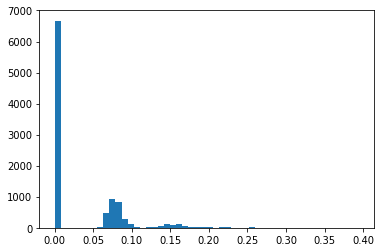

In [135]:
kt = np.array(ktl)
dt=t[2]-t[0]
print(dt)
#plt.hist(kt*,bins=100,alpha=0.2)
#plt.hist(kt*dt*nt[-3]*100/Area,bins=1000,alpha=0.2)
#plt.xlabel('change of molecules')
C=N0/Area
ktm=np.array(cclast)/N0/dt/ST[-3]/C
dat=plt.hist(ktm,bins=50)
#plt.axvline(funcL(tl,P,l,D,Ns,Area)*dt*nt[-3]*100/Area)
np.mean(ktm)
dt

In [173]:
#ktm=CCT/N0/dt/ST[:-1]/C
ktm2=CC/N0/dt/ST[:-1]/C
#plt.plot(t,ktm,'.')
plt.plot(t,funclt(t,ka,R,D),'r-',label='lat theory')       
plt.plot(t,ktm2,'.')

ValueError: operands could not be broadcast together with shapes (152,) (0,) 

In [3]:
kf=0.01
g = 0.577216
L=6.5
f=1.0208582
N0=423
Area = 42.3799
R=0.01
D=1
ka=kf*D*4*pi
l=R*f
w = spatiocyte.SpatiocyteWorld(Real3(0.1*L,L,L),l*0.5)
size=tuple(w.calculate_shape(Real3(0.1*L,L,L),l*0.5))
print(size)
Ns=size[1]*size[2]
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
print(Ns)
T=np.linspace(0.005,0.2,30)
ktL = np.array([invltL(t,D,P,td) for t in T])
plt.title('kf={},D={},R={}'.format(kf,D,R))
plt.plot(T,ktL,'-',label='lattice theory exact DL')
plt.plot(T,funclt(T,ka,R,D),'g-',label='long time cont. theory')
plt.plot(T,funcL(T,P,l,D,Ns,Area),'r--',label='long time lat theory')
plt.ylim(0.114,0.123)
plt.legend()

(80, 638, 736)
469568


NameError: name 'td' is not defined

In [6]:
Ns=1./(100./469568)

In [7]:
sqrt(6*l*l*Ns/4/sqrt(3))

0.6509984941118276

In [271]:
100/6.5/6.5,100./5/5,237/5/5,423/6.5/6.5

(2.366863905325444, 4.0, 9.48, 10.011834319526628)

In [350]:
from scipy.integrate import cumtrapz
dps = 8
def invlt(ka,R,D,t):    #inverse laplace transform of k(z)
    C=R/D**0.5
    mp.dps = dps#15;
    kz = lambda s: 2*np.pi*D*C*special.kv(1,C*(complex(s)**0.5))/complex(s)**0.5/special.kv(0,C*(complex(s)**0.5)) 
    fp= lambda s: ka/(complex(s)+ka/kz(s))
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=True)))
    return ft

R=0.01
D=1
ka=kf*D*4*pi
l=R*f
td = l*l/4/D
print(td)
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
ts = td/P
tlog = 50*td
tmax = 0.2
ds = int(tlog/ts)
tt = np.arange(ts,tmax,ts)
#kth = np.array([invlt(ka,R,D,t) for t in tt])
#Sthe = np.exp(-C*ts*cumtrapz(kth,initial=0))

2.6053786612680994e-05


39 [2.50000e-06 5.21250e-03 1.04225e-02 1.56325e-02 2.08425e-02]


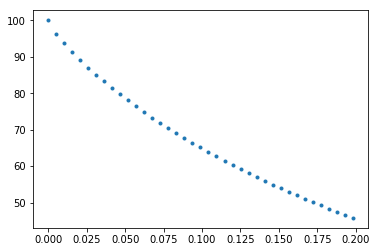

In [399]:
name = '/home/chew/outputdata/keff/2D/2Dirr100N100A423799.csv'
t,st = np.loadtxt(name,delimiter=',').T
ds=int(td*50/(t[1]-t[0]))*4
t=t[::ds]
st=st[::ds]
nt = st*N0
print(len(t),t[:5])
plt.plot(t,nt,'.')

(1.4, 2)

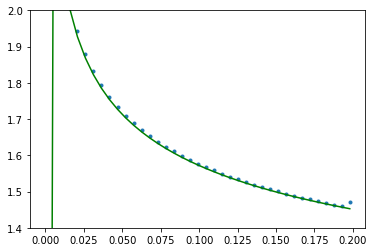

In [401]:
ktthe = calkfrmnt(nt,t,C)
plt.plot(t,ktthe,'.')
plt.plot(t,funclt(t,ka,R,D),'g-',label='long time cont. theory')
plt.ylim(1.4,2)

91.72793663882513 2.6053786612680994e-05 469568
314.2311


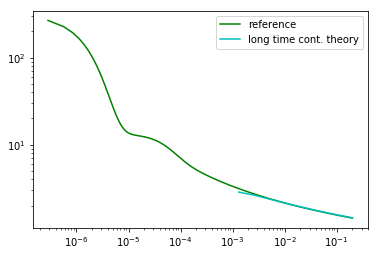

In [213]:
from mpmath import ellipk
mp.dps = 3
def latK(s,D,Pa,td,ka,Ns,kap):
    b1 = Pa/6/td;
    b2 = 1/td;
    p101 = 1/6; 
    zz = b2/(b2+s);
    a = 3/zz+1-(3+6/zz)**0.5;
    b = 3/zz+1+(3+6/zz)**0.5;
    c = (a+1)*(b-1);
    kk = 2*(b-a)/c
    EF = ellipk(kk);
    Pz = 6*EF/pi/zz/(c)**0.5;
    f11 = 1-zz*zz*p101/(Pz-1);
    g = b1/(s+b1+b2-s*zz/3-b2*f11);
    #kap=2*Pa*D*3**0.5
    #kap=Pa*Area/td/Ns
    return kap*(1-g)/s;

def invltL(t,D,Pa,td,ka,Ns,kap): #inverse laplace transform of lattice k(s)
    t = mp.convert(t)
    mydehoog.calc_laplace_parameter(t)
    fpvec = [latK(p,D,Pa,td,ka,Ns,kap) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

R=0.01
kf=100
D=1
ka=kf*D*4*pi
l=R*f
td = l*l/4/D
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
ts = td#/P
tlog = 50*td
tmax = 0.2
ds = int(tlog/ts)
#R=0.01
D=1
ka=kf*D*4*pi
l=R*f
td = l*l/4/D
P=1./(1+math.sqrt(3)*(math.log(f*f/12)+(4*math.pi*D/ka)-2*g)/2/math.pi)
ts = td/P
tlog = 50*td
tmax = 0.2
L=6.5
w = spatiocyte.SpatiocyteWorld(Real3(0.1*L,L,L),l*0.5)
size=tuple(w.calculate_shape(Real3(0.1*L,L,L),l*0.5))
Ns=size[1]*size[2]
print(P,td,Ns)
ds = int(tlog/ts)
#tt = np.arange(ts,tmax,ts)
tt = np.arange(ts,tmax,ts)
#kap=Pa*Area/td/Ns
kap=314.2311
ktL = np.array([invltL(t,D,Pa,td,ka,Ns,kap) for t in tt])
plt.plot(tt,ktL,'g-',label='reference')
print(kap)
#kap = 315.7231
#ktL = np.array([invltL(t,D,Pa,td,ka,Ns,kap) for t in tt])
#plt.plot(tt,ktL,'r--',label='Db0')

#kap=314.2311
#ktL = np.array([invltL(t,D,Pa,td,ka,Ns,kap) for t in tt])
#plt.plot(tt,ktL,'g--',label='Da0')
plt.loglog(t,funclt(t,ka,R,D),'c-',label='long time cont. theory')
#plt.ylim(1.4,2)
plt.legend()

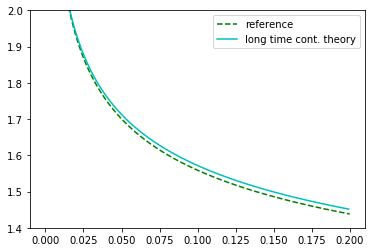

In [218]:
plt.plot(tt,ktL,'g--',label='reference')
plt.plot(t,funclt(t,ka,R,D),'c-',label='long time cont. theory')
plt.ylim(1.4,2)
plt.legend()

4586
[2.84033279e-07 1.30286065e-03 2.60543727e-03 3.90801388e-03
 5.21059050e-03]


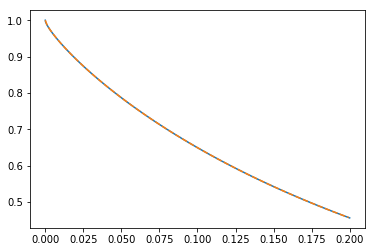

In [225]:
from scipy.integrate import cumtrapz
SthL = np.exp(-(100/Area)*dt*cumtrapz(ktL,initial=0))
ds=int(tlog/ts)
print(ds)
tds = tt[::ds]
Sds = SthL[::ds]
plt.plot(tt,SthL)
plt.plot(tds,Sds,'--')
print(tds[:5])

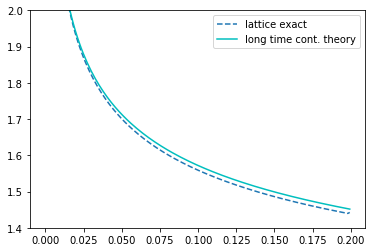

In [222]:
ds=5
ktsim = calkfrmnt(Sds,tds,100/Area)
plt.plot(tds,ktsim,'--',label='lattice exact')
plt.plot(t,funclt(t,ka,R,D),'c-',label='long time cont. theory')
plt.ylim(1.4,2)
plt.legend()

In [305]:
kas=np.array([0.03,0.69,3.45,6.9,10.35,34.84,689.98])
for ka in kas:
    print('ka{},kf={}'.format(ka,ka/4/pi))

ka0.03,kf=0.00238732414637843
ka0.69,kf=0.05490845536670389
ka3.45,kf=0.2745422768335195
ka6.9,kf=0.549084553667039
ka10.35,kf=0.8236268305005584
ka34.84,kf=2.772479108660817
ka689.98,kf=54.90686381727298
